In [4]:
# Convolution operation demo
import pylab
import numpy as np
from scipy import signal

# set img
img = np.array([[10, 10, 10, 10, 10],[10, 5, 5, 5, 10], [10, 5, 5, 5, 10], [10, 5, 5, 5, 10], [10, 10, 10, 10, 10]])

# set convolution
fil = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])

# convolution the img
res = signal.convolve2d(img, fil, mode='valid')

# output the result
print(res)

[[ 15  10   0]
 [ 10   0 -10]
 [  0 -10 -15]]


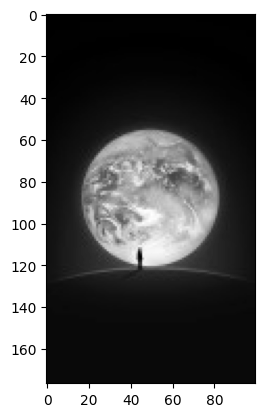

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


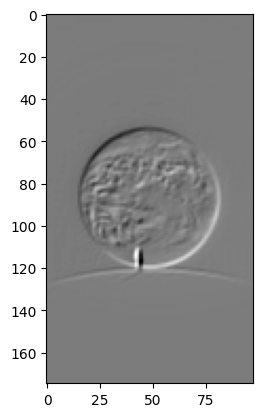

In [6]:
# a image demo

import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np
from scipy import signal

# read the image
img = cv2.imread('./data/weixin.jpg', 0)

# show the image
plt.imshow(img, cmap='gray')
pylab.show()

# set the convolution
fil = np.array([[-1,-1,0], [-1, 0, 1], [0, 1, 1]])

# convolution operation
res = signal.convolve2d(img, fil, mode='valid')
print(res)

# show convolution image
plt.imshow(res, cmap = 'gray')
pylab.show()

In [14]:
# use LeNet model to recognize Mnist handwritten digits
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

# load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x / 255
test_x = test_x / 255

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

# create sequential models
model = Sequential()

# The first convolutional layer: 6 convolution kernels, the size is 5*5, relu activation function
model.add(Conv2D(6, kernel_size = (5,5), activation='relu', input_shape=(28, 28, 1)))

# the second pooling layer: maximum pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# the third convolutional layer: 16 convolution kernels, the size is 5*5, relu activation function
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu'))

# the second pooling layer: maximum pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the parameters, which is called a convolutional layer in leNet5. in fact, this layer is a one-dimensional vector, the same as the fully connected layer
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))

# Fully connected layer, the number of output nodes is 84
model.add(Dense(84, activation = 'relu'))

# The output layer uses the softmax activation function to calculate the classification probability
model.add(Dense(10, activation='softmax'))

# set the loss function and optimizer configuration
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

# Incoming training data for training
model.fit(train_x, train_y, batch_size = 128, epochs = 2, verbose = 1, validation_data = (test_x, test_y))

# Evaluate the results
score = model.evaluate(test_x, test_y)
print('Error: %.4lf' % score[0])
print('Accuracy: ', score[1])







Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 37s 616us/step - loss: 0.3091 - accuracy: 0.9102 - val_loss: 0.1010 - val_accuracy: 0.9696
Epoch 2/2
10000/10000 [==============================] - 3s 328us/step
Error: 0.0572
Accuracy:  0.9814000129699707
